### Tensorflow

* 홈페이지 : http://www.tensorflow.org
* 구글에서 만든 오픈소스 머신러닝 프레임웍
* 다양한 언어를 제공하며 파이썬이 가장 많이 사용됨
* 2020년 5월 현재 최신버전은 2.0

#### 1. Tensorflow 설치
* pip install tensorflow==1.13.1

#### 2. Tensorflow의 특징

* 기본적으로 텐서를 활용한 그래프 수치연산을 하는 도구
* 수학적인 의미에서의 그래프 : 노드와 엣지로 구성된 기하모형
* `노드(Node)` : 연산 및 데이터를 정의하는 것
* `엣지(edge)` : 노드들을 연결하는 것(데이터의 흐름)
* `텐서(tensor)` : 다차원 데이터 배열
* `텐서플로` : 텐서라 노드에서 연산되고 엣지를 통해 돌아 다니는 것 

<img src="./images/30.딥러닝_TensorFlow_01.JPG" width="350" height="300">

#### 3. 텐서플로우 용어
>* Rank : 차원 수
* Shape : 배열 구조
* Rank와 Shape에 따른 n차원 배열
 - Scalar : single number (rank 0), shape = ()
 - Vector : 1-dim array (rank 1), shape = (d0)
 - Matrix : 2-dim array (rank 2), shape = (d0, d1)
 - Tensor : n-dim array (rank n), shape = (d0, d1, …, dn-1)
 
#### 4. Tensorflow의 기본문법

##### 1) Session

 * 그래프를 만드는 작업(실행하는 것은 아님) : 
  - `노드로 연산 및 데이터를 정의하고 코드 흐름으로 엣지를 구성함`
 * 그래프를 만든 후 Session을 생성하여 실행을 시켜야 그래프의 시작점부터 모든 연산을 하게되고 동작을 하게 됨
 * session을 실행시키면 엣지를 통해 데이터들이 출력됨
 * 그래프를 만들고(모델링) Session을 만들어 실행시켜야 노드가 엣지를 타고 이동하면서 원하는 형태로 코드가 실행된다.
 
 > sess = tf.Session()<br>
 > sess.run(실행할 코드)<br>
 > with tf.Session as sess:<br>  
 
##### 2) Fetch : 코드에서 데이터 값을 미리 정하는 것

* `Feed` : `placeholder`등을 통해 데이터값 없이 구조를 만들고 세션을 실행할 경우 `feed_dict`를통해 데이터를 전달
* `placeholder` : 노드에 들어갈 데이터의 형식을 미리 정해 놓은 형태
>input01 = tf.placeholder(tf.float32)

##### 3) 변수와 상수

* `variable` : 학습시키면서 최적화하는 변수의 용도로 사용됨 `학습과정에서 지속적으로 바뀔 수 있는 중요한 값`
* `constant` : 상수
* 변수의 선언
 >tf.Variable(초기값, 타입)
* 변수의 초기화 
 >* tf.global_variables_initializer()를 통해 초기화 할 수 있음
 * 변수는 반드시 초기화를 해야 함
 * 초기화는 노드에 값을 입력한다는 의미
 
##### 4) 텐서플로의 자료형
 - tf.float16 : 표준16비트 부동소수점
 - tf.float32 : 표준32비트 부동소수점
 - tf.float64 : 표준64비트 부동소수점
 - tf.bfloat16 : 텐서플로만의 16비트 truncated 부동소수점
 - tf.complex64 : 표준 64비트 복소수
 - tf.complex128 : 표준 128비트 복소수
 - tf.int8 : 표준 8비트 정수
 - tf.uint8 : 표준 8비트 무부호정수(양수정수)
 - tf.uint16 : 표준 16비트 무부호정수(양수정수)
 - tf.int16 : 표준 16비트 정수
 - tf.int32 : 표준 32비트 정수
 - tf.int64 : 표준 64비트 정수
 - tf.bool : Boolean
 - tf.string : 문자열 
 - tf.qint8 : 텐서플로만의 Quantized 8비트정수
 - tf.quint8 : 텐서플로만의 Quantized 8비트 무부로정수(양수)
 - tf.qint16 : 텐서플로만의 Quantized 16비트정수
 - tf.quint16 : 텐서플로만의 Quantized 16비트 무부로정수(양수)
 - tf.qint32 : 텐서플로만의 Quantized 32비트정수

In [4]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

In [6]:
import tensorflow as tf
import sys
print('Python ver.:', sys.version)
print('Tensorflow ver.:', tf.__version__)

Python ver.: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Tensorflow ver.: 1.13.1


##### 1. Tensorflow 기본문법

In [22]:
# 상수선언
hello = tf.constant("Hello Tensorflow")
print(hello)
# 이 때에는 출력이 되지 않음(텐서프로우 자료형의 정보만 출력된다. 즉, 그래프형태만 출력)
# Session객체를 만들고 run()메서드를 호출해야 처리가 된다.
# 텐서플로우는 모델구성(선언)단계와 실행단계가 구분이 된다.

x = tf.constant(10)
y = tf.constant(10)
z = tf.add(x, y) # x + y -> z
print(x,y,z)

# 상기에서 정의한 그래프를 실행할 세션을 생성
sess = tf.Session()

# sess.run() : 텐서그래프(변수, 식)를 실행
# 문자열 unicode가 기본이기 때문에 str()함수로 encoding을 해야 byte가 아닌 unicode로 변환
print(sess.run(hello)) # 텐서플로우는 기본이 byte타입
print(str(sess.run(hello), encoding="utf-8"))
print(sess.run([x,y,z]))

# 세션을 종료
sess.close()

Tensor("Const_17:0", shape=(), dtype=string)
Tensor("Const_18:0", shape=(), dtype=int32) Tensor("Const_19:0", shape=(), dtype=int32) Tensor("Add_5:0", shape=(), dtype=int32)
b'Hello Tensorflow'
Hello Tensorflow
[10, 10, 20]


In [24]:
# with문을 이용해서 sess을 자동종료
a = tf.constant(10.0)
b = tf.constant(10.0)
c = tf.add(a, b)
with tf.Session() as sess:
    print(sess.run(c))

20.0


##### 2. placeholder(그래프의 입력변수)

In [30]:
# 1. placehoder
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(tf.float32)
c = tf.multiply(a, b)
with tf.Session() as sess:
    # print(sess.run(c)) # 변수가 초기화 되지 않고 타입만 선언했기 때문에 에러발생
    # 변수값을 설정하기 위해서는 feed_dic={}옵션을 사용해서 데이터를 입력
    print(sess.run(c, feed_dict={a:10, b:20}))
    print(sess.run(c, feed_dict={a:10, b:30.0}))
    print(sess.run(c, feed_dict={a:[10.0], b:[40.0]}))
    print(sess.run(c, feed_dict={a:[10, 20, 30], b:[50,60,70]}))

200.0
300.0
[400.]
[ 500. 1200. 2100.]


In [34]:
# 2. Variable : 변수선언
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
y = tf.add(tf.multiply(W,x), b)   # y = Wx + b

# 변수를 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # linear_model : y = wx + b
    result = sess.run(y, feed_dict={x:[1,2,3,4]})
    
print(result)
print(type(result))

[0.         0.3        0.6        0.90000004]
<class 'numpy.ndarray'>


In [38]:
# 3. placeholder와 변수의 개념
# tf.placeholder는 계산을 실행할 때 입력값을 전달 받는 변수
# None : 크기가 정해져 있지 않았음을 의미한다.
X = tf.placeholder(tf.float32, [None, 3])
print(X)

# placeholder X에 전달할 값 : 2차원자료 즉 2행3열의 값
x_data = [[1,2,3],[4,5,6]]
print(x_data)

# tf.Variable() : 그래프를 계산하면서 전달(최적화)할 변수
# tf.random_normal() : 각 변수의 초기값을 정규분포가 된 랜덤값으로 초기화
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))
print(W)
print(b)

# 입력된값과 변수들을 계산할 수식(그래프)을 작성
# tf.matmul() : 행렬곱셈, mat로 시작하는 함수는 행렬연산과 관련된 함수
y = tf.matmul(X, W) + b
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(W))
    print(sess.run(b))
    print(sess.run(y, feed_dict={X:x_data}))

Tensor("Placeholder_14:0", shape=(?, 3), dtype=float32)
[[1, 2, 3], [4, 5, 6]]
<tf.Variable 'Variable_8:0' shape=(3, 2) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(2, 1) dtype=float32_ref>
[[-1.2781782  -2.0553796 ]
 [-0.08856291  0.8327506 ]
 [ 0.5201344   0.8433833 ]]
[[0.4358971]
 [0.6095383]]
[[ 0.5409962  2.5761688]
 [-1.8251827  1.6120727]]


##### Tensorflow실습
###### 실습 1. 회귀분석 : 전기생산량과 소비량

In [61]:
# 월별 전기생산금액(단위 : 억원)
x = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
# 월별 전기사용량(단위 : 백만kwh)
y = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

In [62]:
# 가중치(weight)와 절편(bias)
# tf.random_uniform(변수의 형태, 최소값, 최대값) 무작위수
# -1.0 ~ 1.0 사이의 값을 생성
# name : 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 부여, 
# name='weight'은 텐서플로에서 사용하는 변수이고 weight는 로직에서 사용하는 변수
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias') 

# placeholder : 데이터를 담는 저장소
# 그래프에서 X(입력값)을 
# 그래프를 구출할 떄는 메모리에 저장하지 않고 그래프를 실행할 때 피드하면서 메모리에 저장
X = tf.placeholder(dtype=tf.float32, name="X")
Y = tf.placeholder(dtype=tf.float32, name="Y")

In [63]:
# 파리미터설정
learning_rate = 0.01 # 학습률
epochs = 1000 # 학습단계
step_display = 50 # 진행상태를 출력할 단계

### 손실(비용)함수

#### 오차의 합
>### $$오차의 합 = \sum_{i=1}^{n}(p_i - y_i)^2$$
#### 평균제곱오차(MSE, Mean Squared Error)
>### $$MSE = \frac{1}{n}\sum_{i=1}^{n}(p_i - y_i)^2$$
#### 평균제곱근오차(RMSE, Root Mean Squared Error)
>### $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(p_i - y_i)^2}$$

In [67]:
# X와 Y의 상관관계를 분석하기위해서 회귀모델을 작성
# y = w * x + b
# W와 X가 행렬이아니기 때문에 행렬곱(tf.matmul)이 아니라 기본곱셈연산을 수행
h0 = weight * X + b

# 예측 : 
y_pred = tf.add(tf.multiply(weight, X), bias)

# 손실(비용)함수 : 예측값과 실제값의 거리를 계산하는 함수
# 비용을 최소화 시키는 함수 : RMSE(평균제곱근오차)
cost = tf.reduce_mean(tf.square(y_pred - Y))  

# 학습 : AdamOptimizer : 현재 가장 성능이 뛰어난 알고리즘
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [68]:
# 변수초기화
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [73]:
# optimizer와 cost를 텐서그래프에 적용
# 계산에 필요한 값은 feed_dict를 통해 전달
# placeholder인 X, Y에 데이터를 연속적으로 전달할 자료를 작성
# cost계산 : 정해진 데이터셋에서 한 샘플씩 불러와서 cost를 계산
# optimizer계산 : cost로 부터 error를 계산한 후 모델에 대한 편미분을 자동으로
#   계산해주는 과정을 이용하여 모델 W, b를 수정
for epoch in range(epochs):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X:x, Y:y})
    if(epoch+1) % step_display == 0:
        print("학습단계:{0}, 손실:{1}, 가중치:{2}, 절편:{3}".
             format(epoch+1, cost_val, sess.run(weight), sess.run(bias)))

학습단계:50, 손실:0.027118535712361336, 가중치:[0.42626417], 절편:[1.1946774]
학습단계:100, 손실:0.027067648246884346, 가중치:[0.42716616], 절편:[1.1910987]
학습단계:150, 손실:0.02701621502637863, 가중치:[0.42809033], 절편:[1.1874323]
학습단계:200, 손실:0.026964308694005013, 가중치:[0.42903578], 절편:[1.1836811]
학습단계:250, 손실:0.026912031695246696, 가중치:[0.43000185], 절편:[1.1798484]
학습단계:300, 손실:0.02685943804681301, 가중치:[0.4309877], 절편:[1.1759374]
학습단계:350, 손실:0.02680668979883194, 가중치:[0.43199238], 절편:[1.1719513]
학습단계:400, 손실:0.026753829792141914, 가중치:[0.43301532], 절편:[1.1678928]
학습단계:450, 손실:0.026700923219323158, 가중치:[0.43405563], 절편:[1.1637657]
학습단계:500, 손실:0.026648104190826416, 가중치:[0.43511236], 절편:[1.159573]
학습단계:550, 손실:0.026595449075102806, 가중치:[0.43618482], 절편:[1.155318]
학습단계:600, 손실:0.02654300630092621, 가중치:[0.437272], 절편:[1.1510048]
학습단계:650, 손실:0.02649088203907013, 가중치:[0.4383731], 절편:[1.1466365]
학습단계:700, 손실:0.026439158245921135, 가중치:[0.43948707], 절편:[1.1422168]
학습단계:750, 손실:0.026387915015220642, 가중치:[0.44061315], 절편:[1.1

In [74]:
training_cost = sess.run(cost, feed_dict={X:x, Y:y})
print('최종손실=', cost_val)
print("예측정확도=", 100-cost_val)
print("최종기울기(가중치)=", sess.run(weight))
print("최종절편=", sess.run(bias))

최종손실= 0.026141308
예측정확도= 99.97385869175196
최종기울기(가중치)= [0.44639027]
최종절편= [1.1148288]


In [75]:
# 최적화가 완료된 모델에 테스트값을 넣어서 결과를 확인
print("X(전기생산금액), Y(예측전기소비량)" ,sess.run(h0, feed_dict={X:5}))
print("X(전기생산금액), Y(예측전기소비량)" ,sess.run(h0, feed_dict={X:2.5}))

X(전기생산금액), Y(예측전기소비량) [[2.522487 ]
 [3.4985254]]
X(전기생산금액), Y(예측전기소비량) [[1.4065113]
 [2.3825498]]


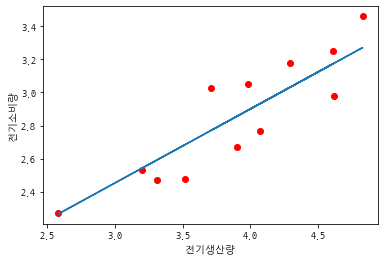

In [77]:
# 시각화
plt.plot(x,y,'ro')
plt.plot(x, sess.run(weight)* x + sess.run(bias))
plt.xlabel("전기생산량")
plt.ylabel("전기소비량")
plt.show()

In [59]:
# 세션을 종료
sess.close()

###### 실습 2. MNIST실습

* 숫자를 손글씨로 쓴 이미지 데이터 셋
* 다운로드 : * http://yann.lecun.com/exdb/mnist
<img src="./images/30.딥러닝_Tensorflow_02_02.JPG" width="500" height="500">

>* 6만개의 학습용 데이터와 1만개의 검증용 데이터로 구성
* train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
>><img src="./images/30.딥러닝_Tensorflow_02_03.JPG" width="500" height="500">
* mnist.train.images파일은 `[55000, 764]의 형태`를 가진 텐서(n차원배열 임(이미지갯수, 이미지의 픽셀)

##### 경사하강법 (GD, Gradient Descent)
<img src="./images/30.딥러닝_Tensorflow_02_04.JPG" width="700" height="500">

##### 배치경사하강법 (BGD, Batch Gradient Descent)
<img src="./images/30.딥러닝_Tensorflow_02_05.JPG" width="500" height="400">

##### 확률적경사하강법 (SGD, Stochastic Gradient Descent)
<img src="./images/30.딥러닝_Tensorflow_02_06.JPG" width="700" height="500">

In [79]:
# MNIST(손글씨 이미지 숫자 인식)를 신경망으로 실습
from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist모듈을 이용하여 데이터를 로드
# 지정한 폴더에 MNIST데이터가 없을 경우 자동으로 데이터를 다운로드한다.
# one_hot옵션은 label 데이터셋을 만들떄, label을 one-hot방식으로 처리할지 여부를 설절
# one_hot의 기본값은 False이 때문에 실습에서는 반드시 True로 할 것
# 데이터가 one_hot방식으로 출력이 되면 처리하는 시점에 별도로 변환하지 않아도 되기때문에 편리하다.
mnist = input_data.read_data_sets("../data/deeplearning/mnist/", one_hot=True)

Extracting ../data/deeplearning/mnist/train-images-idx3-ubyte.gz
Extracting ../data/deeplearning/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/deeplearning/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/deeplearning/mnist/t10k-labels-idx1-ubyte.gz


### Cross Entropy Error(CEE, 손실함수)
>### $$E = -\sum_{i=1}^{n}{p_i}{log(y_i)}$$

In [81]:
# 변수선언
x = tf.placeholder(tf.float32, [None, 784]) # 이미지 28 x 28 = 784

# [이미지픽셀, 출력값]
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 손실함수 : cross_entropy 모델설정(손실을 최소화 시키는 함수)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_* tf.log(y), reduction_indices=[1]))

# 학습비율을 0.5로 설정
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# 경사하강법으로 모델을 학습
# 텐서플로우가 각각의 변수를 비용을 최소화시키는 방향으로 조금씩 이동 시키는 방법
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [85]:
# 학습(1000)
for i in range(1000):
    # 무작위로 100개씩 이미지를 추출해서 학습
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})

In [91]:
# 모델평가하기
# tf.argmax() : 가장 큰 값이 있는 위치를 리턴
# tf.argmax(y, 1) : 예측라벨(예측한 값 즉, 가장 증거값이 큰 라벨)
# tf.argmax(y_, 1): 실제라벨
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

# boolean리스트를 float로 변환한 후 평균값을 계산 = 예측율
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9179


In [119]:
print('훈련용 이미지갯수:', len(mnist.train.images))
print('훈련용 이미지라벨:', mnist.train.num_examples)
print(mnist.train.images[0].shape)

훈련용 이미지갯수: 55000
훈련용 이미지라벨: 55000
(784,)


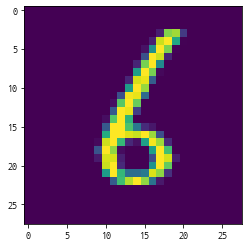

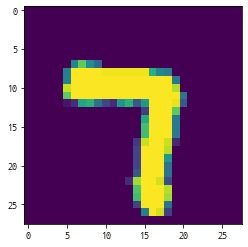

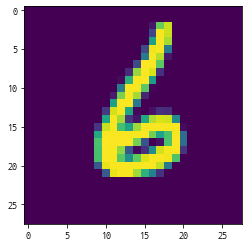

In [129]:
# 시각화
n, m = 28, 28
def convertlist(img):
    a = np.array(mnist.train.images[img]) # 1차원배열
    b = a.reshape(n,m)  # 2차원배열 28x28로 변환
    plt.imshow(b)
    # plt.imshow(b, cmap='Reds')
    plt.show()
    
# convertlist(2)

startImage = 10000
for i in range(startImage, startImage+3):
    convertlist(i)

###### 인공신경망 실습

In [130]:
from tensorflow.examples.tutorials.mnist import input_data
# one_hot=False로 설정할 것
mnist = input_data.read_data_sets("../data/deeplearning/mnist/", one_hot=False)

Extracting ../data/deeplearning/mnist/train-images-idx3-ubyte.gz
Extracting ../data/deeplearning/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/deeplearning/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/deeplearning/mnist/t10k-labels-idx1-ubyte.gz


In [137]:
# 학습파라미터설정
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# 인공신경망의 파라미터설정
n_hidden_1 = 256 # 첫번째 은닉층의 뉴런 갯수
n_hidden_2 = 256 # 두번째 은닉층의 뉴런 갯수
num_input = 784 # MNIST input data (img shape 784 = 28x28)
num_classes = 10 # MNIST total classes(0~9의 숫자)

In [141]:
# 인공신경망 설정함수
def neural_net(x_dict):
    x = x_dict['images']    
    layer_1 = tf.layers.dense(x, n_hidden_1) # 첫번째은닉층
    layer_2 = tf.layers.dense(layer_1, n_hidden_2) # 두번째은닉층
    out_layer = tf.layers.dense(layer_2, num_classes) # 출력층
    return out_layer

# 인공신경망모델 생성
def model_fn(features, labels, mode):
    logits = neural_net(features) # 인공신경망생성
    
    # 예측
    pred_classes = tf.argmax(logits, axis=1) 
    pred_probas = tf.nn.softmax(logits)
    
    # 예측모드일 경우 리턴
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    # 손실(비용)함수 정의 
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # 모델의 적합도 평가
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy':acc_op})
    
    return estim_specs

In [148]:
# 인공신경망 설정함수
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # 첫번쨰 은닉층 정의
    layer_1 = tf.layers.dense(x, n_hidden_1)    
    #두번쨰 은닉층 정의
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # 출력층정의
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # 인공신경망생성
    logits = neural_net(features)
    
    # 예측
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # 예측모드일경우 리턴
    if mode == tf.estimator.ModeKeys.PREDICT:     
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    # 손실함수(비용함수)정의
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(    
        logits=logits, labels=tf.cast(labels, dtype=tf.int32))) 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)        
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())


    # 모델의 적합도 평가
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [149]:
# 참고 : https://www.tensorflow.org/guide/estimator
#      : http://www.kwangsiklee.com/2018/03/텐서플로우-estimator에-대해-자세히-알아보기/
#      : https://www.tensorflow.org/tutorials/estimator/linear?hl=ko
# Estimator?
# 모델설정하고 모델의 그래프를 그린 다음 모델에 대한 loss함수를 정의하고
# Optimizer를 정의하여 loss값의 최소값을 찾고 prediction값을 계산하는 함수이다.
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\TJOEUN~1\\AppData\\Local\\Temp\\tmpe6f_n3kv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BE1E6699C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [153]:
# 데이터학습을 위한 입력함수
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images':mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True
)

# 모델학습
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\TJOEUN~1\AppData\Local\Temp\tmpe6f_n3kv\model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\TJOEUN~1\AppData\Local\Temp\tmpe6f_n3kv\model.ckpt.
INFO:tensorflow:loss = 0.23993942, step = 1001
INFO:tensorflow:global_step/sec: 266.669
INFO:tensorflow:loss = 0.22740088, step = 1101 (0.375 sec)
INFO:tensorflow:global_step/sec: 254.485
INFO:tensorflow:loss = 0.23668274, step = 1201 (0.394 sec)
INFO:tensorflow:global_step/sec: 261.795
INFO:tensorflow:loss = 0.36590517, step = 1301 (0.383 sec)
INFO:tensorflow:global_step/sec: 274.706
I

In [154]:
# 모델평가를 위한 입력함수
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images':mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

# 평가함수호출, 그 결과를 리턴
e = model.evaluate(input_fn)
print("검증정확도:", e['accuracy'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-12T06:41:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TJOEUN~1\AppData\Local\Temp\tmpe6f_n3kv\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-12-06:41:14
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9191, global_step = 2000, loss = 0.28254554
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\TJOEUN~1\AppData\Local\Temp\tmpe6f_n3kv\model.ckpt-2000
검증정확도: 0.9191


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\TJOEUN~1\AppData\Local\Temp\tmpe6f_n3kv\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


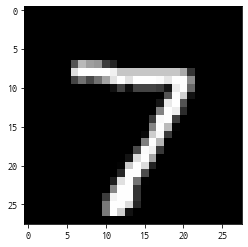

모델이 예측한 숫자: 7


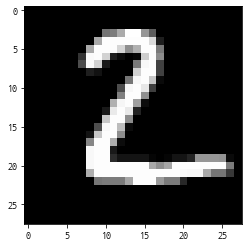

모델이 예측한 숫자: 2


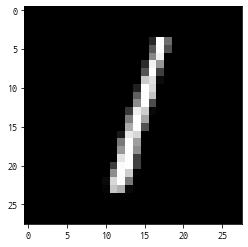

모델이 예측한 숫자: 1


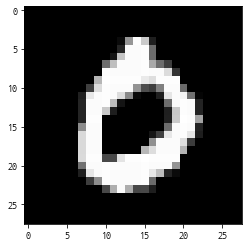

모델이 예측한 숫자: 0


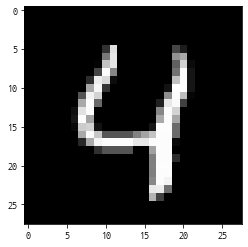

모델이 예측한 숫자: 4


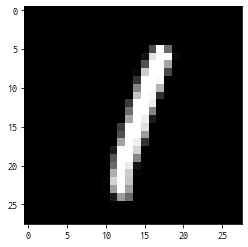

모델이 예측한 숫자: 1


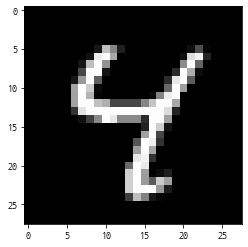

모델이 예측한 숫자: 4


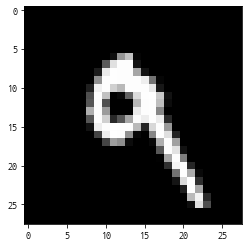

모델이 예측한 숫자: 9


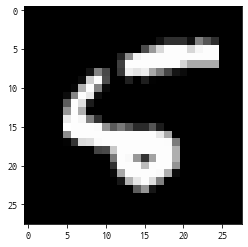

모델이 예측한 숫자: 6


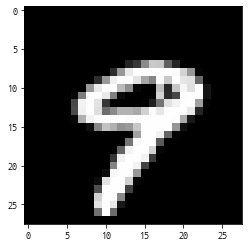

모델이 예측한 숫자: 9


In [160]:
# 이미지예측
n_images = 10

# 검증용 데이터셋에서 이미지를 선택
test_images = mnist.test.images[:n_images]
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images':test_images}, shuffle=False
)
preds = list(model.predict(input_fn))
preds

# 입력데이터
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28,28]), cmap='gray')
    plt.show()
    print('모델이 예측한 숫자:', preds[i])